<a href="https://colab.research.google.com/github/hrutik016/30-days-of-ML-using-MATLAB/blob/master/Jupyter_NB_Importing_and_Exporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

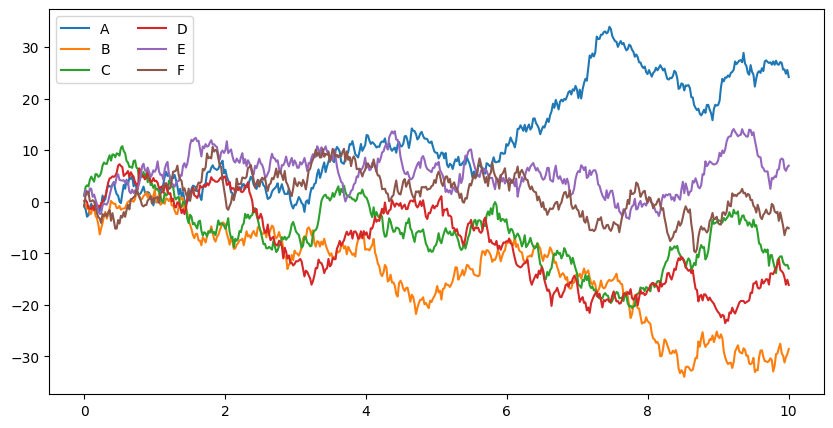

In [4]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

plt.figure(figsize=(10,5))
plt.plot(x,y)

plt.legend('ABCDEF', ncol=2, loc='upper left')

In [6]:
import requests
import pandas as pd

In [7]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-08-05 17:09:28.872402')

In [9]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [10]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin

In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-05 18:00:00,29001,29037,29001,29037,15.007305,435478.628144
2023-08-05 19:00:00,29035,29065,29026,29046,10.620917,308491.945726
2023-08-05 20:00:00,29050,29058,29035,29037,6.399960,185878.716532
2023-08-05 21:00:00,29037,29040,29029,29030,4.607697,133791.591167
2023-08-05 22:00:00,29030,29056,29029,29051,3.755326,109068.777915


<Axes: xlabel='CloseTime'>

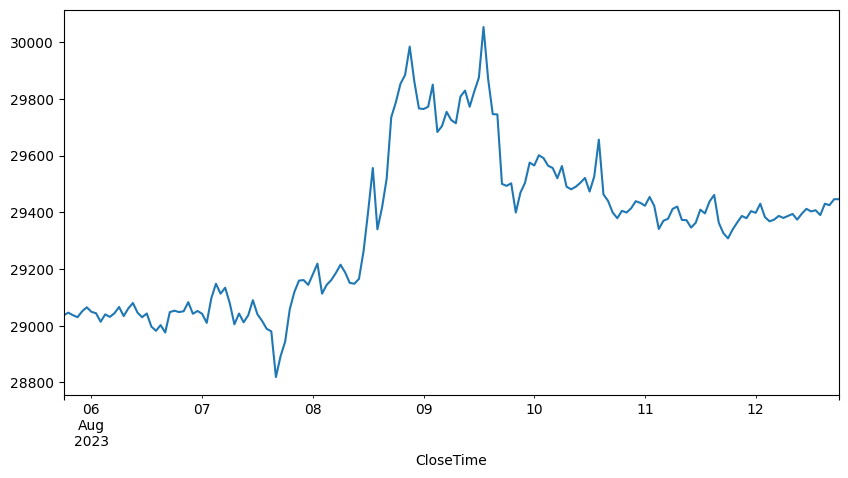

In [12]:
btc['ClosePrice'].plot(figsize=(10,5))

### Ether

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-05 18:00:00,1829.0,1832.7,1829.0,1832.5,36.311697,66507.856023
2023-08-05 19:00:00,1832.5,1837.3,1831.7,1835.5,62.891218,115348.668991
2023-08-05 20:00:00,1835.8,1836.4,1833.4,1833.4,47.724264,87579.504127
2023-08-05 21:00:00,1833.4,1833.8,1832.0,1833.0,49.167902,90129.816315
2023-08-05 22:00:00,1832.9,1835.1,1832.8,1833.4,64.481083,118260.302414


<Axes: xlabel='CloseTime'>

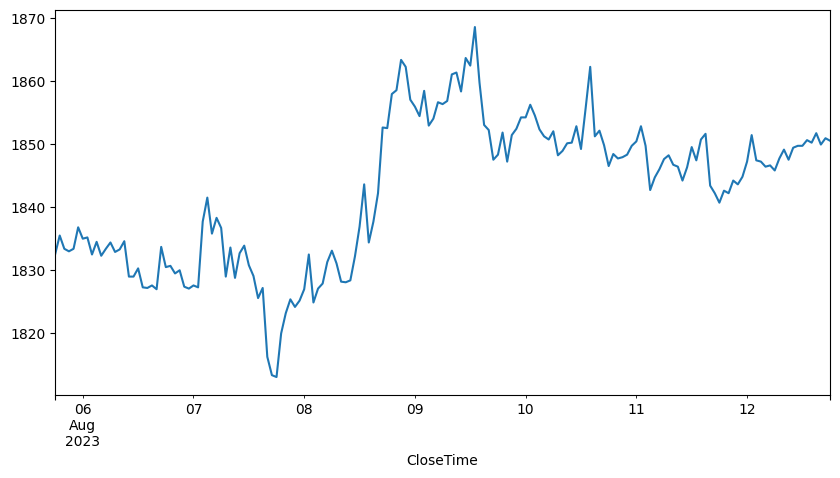

In [15]:
eth['ClosePrice'].plot(figsize=(10,5))

### Dynamic plots with Bokeh

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [18]:
output_notebook()

In [22]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend_label='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend_label='Ether')

p1.legend.location = "top_left"

show(p1)

### Exporting to Excel

In [24]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [25]:

btc.to_excel(writer, sheet_name='Bitcoin')

In [26]:
eth.to_excel(writer, sheet_name='Ether')

In [27]:
# we will save the file

writer.save()

<ipython-input-27-29ee553ef374>:3: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
